# **📽📺 Netflix Movies & TV Shows - EDA with Visualization**
<span style="font-size:17px; color:#006799; font-weight:bold">by: Felice Benita</span>
***

<br/>
<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">1. Importing Datasets</span></div>

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Reading data
df = pd.read_csv('D:/Pedoman/Portfolio/EDA with Python/Netflix Movies and TV Shows/netflix_titles.csv') # Loading data
df.head() # Displaying the first 5 lines of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">2. Data Description</span></div>

In [3]:
# Let's look at the dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 8807 records and 12 columns.


In [4]:
# Get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Data type of each columns
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


<br/>
<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">3. Data Wrangling</span></div>

In [6]:
# Checking the unique values
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
# Checking the Duplicates
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)

(8807, 12)


In [8]:
# Check the number of missing values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Replace missing values with 'Unspecified'
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unspecified')

In [10]:
# Check again the number of missing values in each column
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

<br/>
<div style="display:fill; padding:10px 15px;
           border-radius:5px;
           background-color:#DCD0C2;
           letter-spacing:0.5px"><span style="font-size:22px; color:#765103; font-weight:bold">4. Exploratory Data Analysis (EDA)</span></div>

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.1. Movie & TV Show Distribution</span>

[Text(0.5, 0, ''), Text(0, 0.5, '')]

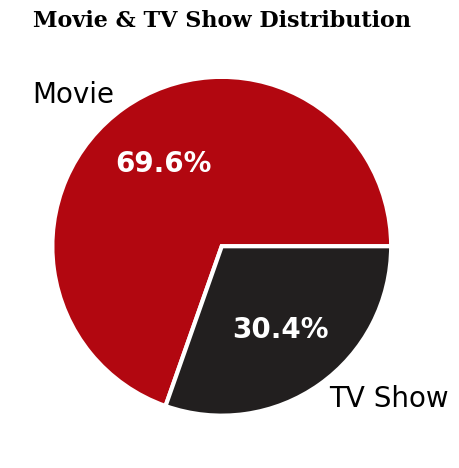

In [11]:
fig, ax = plt.subplots(1, figsize=(11, 5.5))

colors = ["#b20710", "#221f1f"]
# Pie Chart
# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    df['type'].value_counts(), labels = df['type'].value_counts().index, autopct='%1.1f%%', colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 20})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title("Movie & TV Show Distribution", fontfamily='serif', fontsize=16, fontweight='bold')
ax.set(xlabel=None, ylabel=None)

We see vastly more movies than TV shows on Netflix.

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.2. The Most Popular Categories</span>

<span style="padding-left:20px; font-size:18px; color:#339; font-weight:bold">4.2.1 The Most Popular Movie Categories</span>

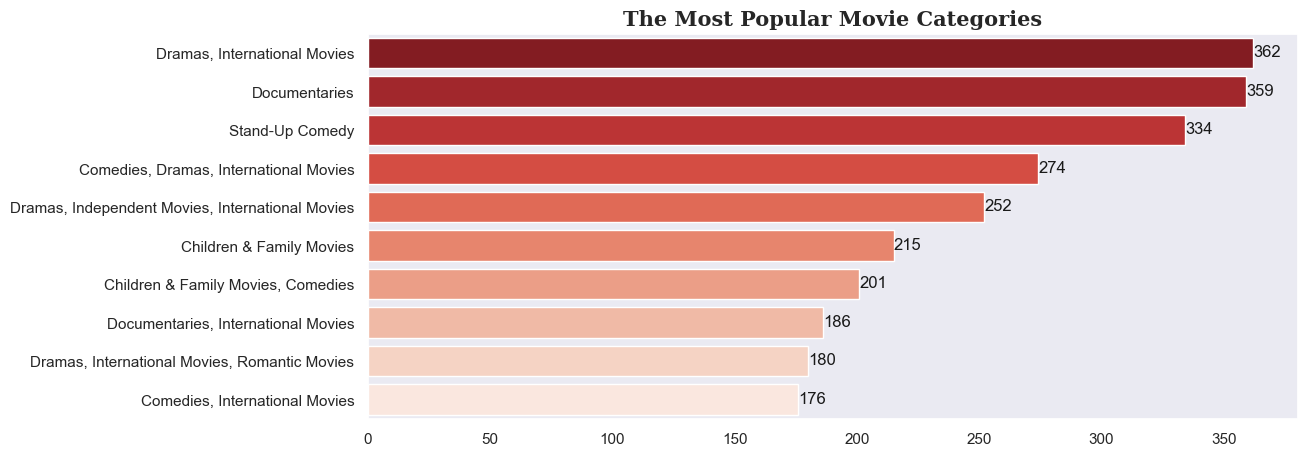

In [12]:
movies_cat = df[df['type'] == 'Movie']
movies_cat = movies_cat[movies_cat['listed_in'] != 'Unspecified']
movies_cat = movies_cat.groupby('listed_in').agg({'show_id':'count'}).rename({'show_id': 'total_cat'}, axis = 1)
movies_cat = movies_cat.sort_values(['total_cat'], ascending = (False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (12, 5)})
ax = sns.barplot(data=movies_cat, x="total_cat", y="listed_in", palette="Reds_r")
ax.set_title("The Most Popular Movie Categories", fontfamily='serif', fontsize=15, fontweight='bold')
ax.set(xlabel=None, ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().astype('int')), fontsize=12, color='k')
ax.grid(False)

<span style="padding-left:20px; font-size:18px; color:#339; font-weight:bold">4.2.2 The Most Popular TV Show Categories</span>

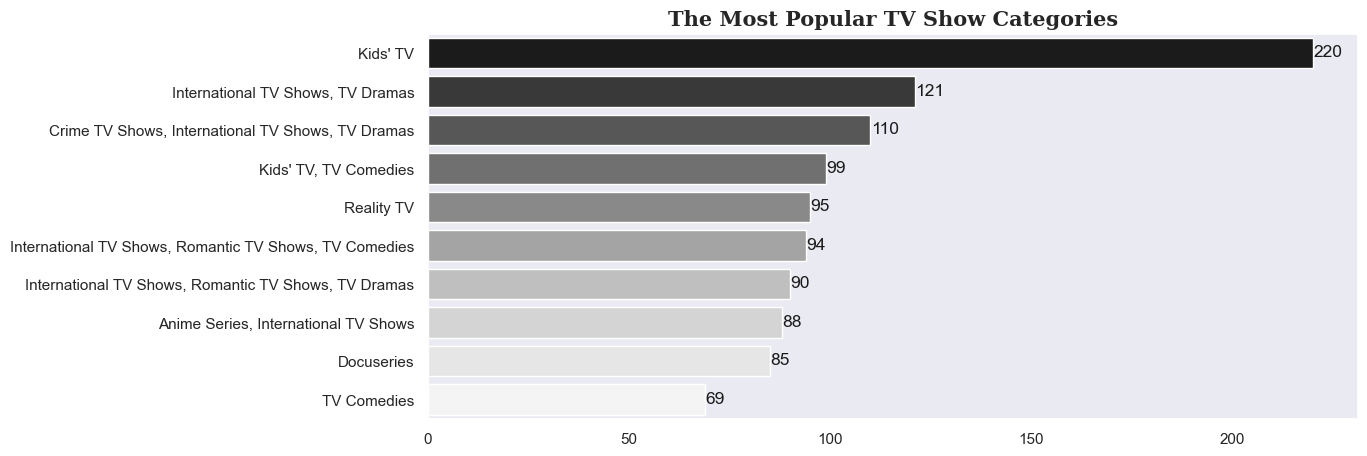

In [13]:
tvshows_cat = df[df['type'] == 'TV Show']
tvshows_cat = tvshows_cat[tvshows_cat['listed_in'] != 'Unspecified']
tvshows_cat = tvshows_cat.groupby('listed_in').agg({'show_id':'count'}).rename({'show_id': 'total_cat'}, axis = 1)
tvshows_cat = tvshows_cat.sort_values(['total_cat'], ascending = (False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (12, 5)})
ax = sns.barplot(data=tvshows_cat, x="total_cat", y="listed_in", palette="Greys_r")
ax.set_title("The Most Popular TV Show Categories", fontfamily='serif', fontsize=15, fontweight='bold')
ax.set(xlabel=None, ylabel=None)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().astype('int')), fontsize=12.5, color='k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.3. Countries that Produced The Most Content</span>

<span style="padding-left:20px; font-size:18px; color:#339; font-weight:bold">4.3.1 The Most Movie Producing Countries</span>

[Text(0.5, 0, 'Country'), Text(0, 0.5, '')]

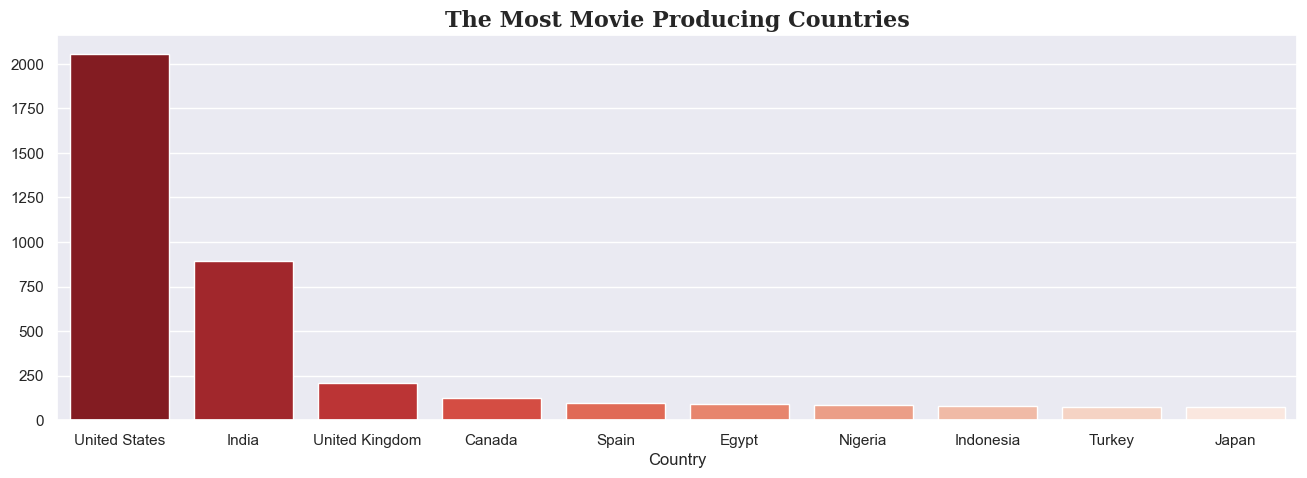

In [14]:
movies = df[df['type'] == 'Movie']
movies = movies[movies['country'] != 'Unspecified']
movies = movies.groupby('country').agg({'show_id':'count'}).rename({'show_id': 'total_movies'}, axis = 1)
movies = movies.sort_values(['total_movies'], ascending = (False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (16, 5)})
ax = sns.barplot(data=movies, x="country", y="total_movies", palette="Reds_r")
ax.set_title("The Most Movie Producing Countries", fontfamily='serif', fontsize=16, fontweight='bold')
ax.set(xlabel='Country', ylabel=None)

<span style="padding-left:20px; font-size:18px; color:#339; font-weight:bold">4.3.2 The Most TV Show Producing Countries</span>

[Text(0.5, 0, 'Country'), Text(0, 0.5, '')]

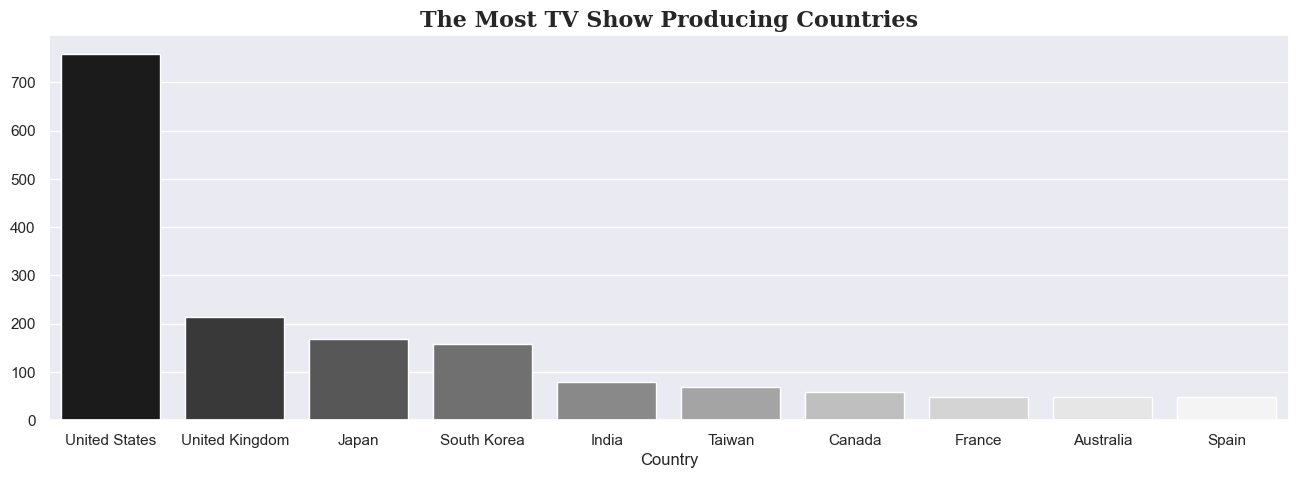

In [15]:
tvshows = df[df['type'] == 'TV Show']
tvshows = tvshows[tvshows['country'] != 'Unspecified']
tvshows = tvshows.groupby('country').agg({'show_id':'count'}).rename({'show_id': 'total_tv_shows'}, axis = 1)
tvshows = tvshows.sort_values(['total_tv_shows'], ascending = (False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (16, 5)})
ax = sns.barplot(data=tvshows, x="country", y="total_tv_shows", palette="Greys_r")
ax.set_title("The Most TV Show Producing Countries", fontfamily='serif', fontsize=16, fontweight='bold')
ax.set(xlabel='Country', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.4. The Most Popular Directors</span>

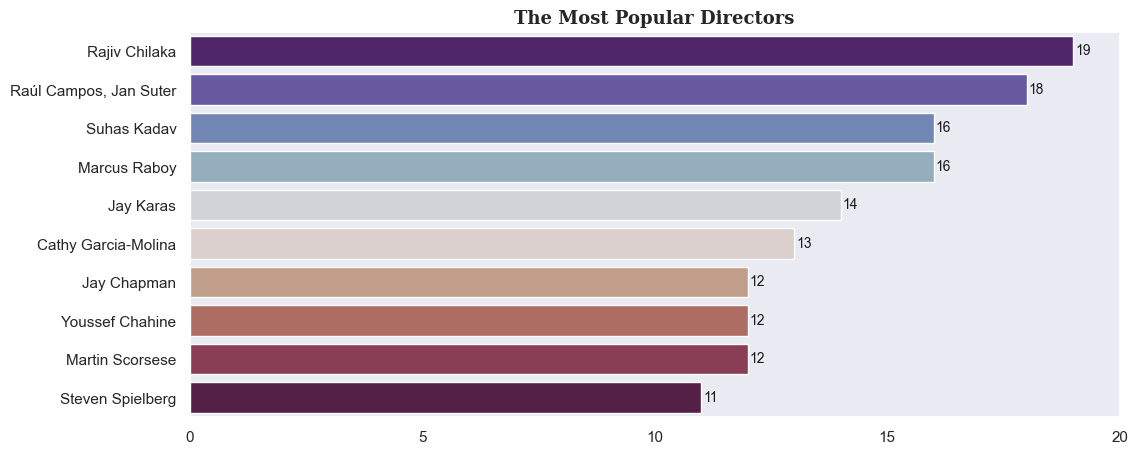

In [16]:
from  matplotlib.ticker import FuncFormatter
directors = df[df['director'] != 'Unspecified']
directors = directors.groupby('director').agg({'show_id':'count'}).rename({'show_id': 'total_show'}, axis = 1)
directors = directors.sort_values(['total_show'], ascending = (False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (12, 5)})
ax = sns.barplot(data=directors, x="total_show", y="director", palette="twilight_shifted")
ax.set_title("The Most Popular Directors", fontfamily='serif', fontsize=13, fontweight='bold')
ax.set(xlabel=None, ylabel=None)
plt.gca().set(xticks=[0, 5, 10, 15, 20])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width().astype('int')), fontsize=10, color='k')
ax.grid(False)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.5. Movies & TV Shows Added Over Time</span>

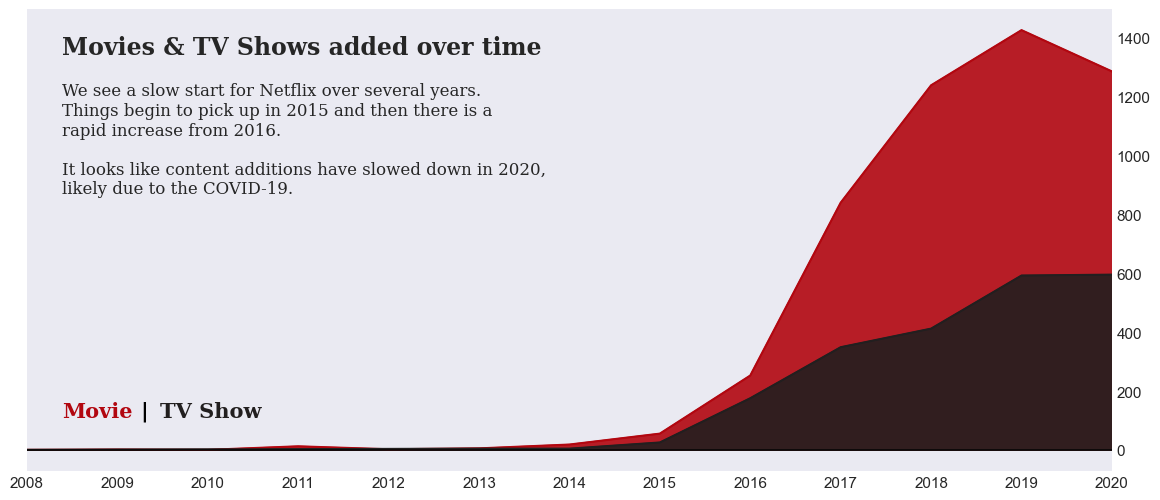

In [17]:
df['date_added'] = df['date_added'].fillna(0)
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['year_added'] = df['year_added'].astype('int')
data = df.query("year_added >= 2007")

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(data['type'].value_counts().index):
    mtv_rel = data[data['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.15, 0.805, 'Movies & TV Shows added over time', fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.15, 0.54, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19.
'''
, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.15,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.206,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.22,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.6. Monthly Content Addition Trends</span>

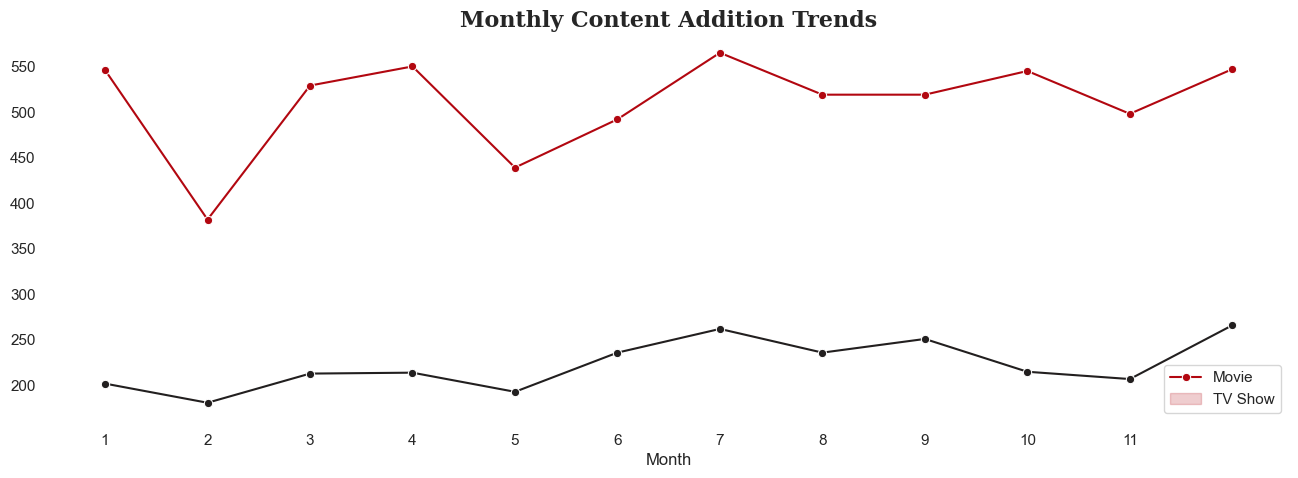

In [18]:
df['date_added'] = df['date_added'].fillna(0)
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
df['month_added'] = df['month_added'].astype('int')
data = df.groupby(['month_added','type']).agg({'show_id':'count'}).rename({'show_id': 'total_added'}, axis = 1)

color_dict = dict({'Movie':'#b20710', 'TV Show':'#221f1f'})
sns.set(rc = {'figure.figsize': (16, 5), 'axes.facecolor':'white'})
ax = sns.lineplot(data=data, x="month_added", y="total_added", hue="type", marker="o", palette=color_dict)
ax.set_title("Monthly Content Addition Trends", fontfamily='serif', fontsize=16, fontweight='bold')
ax.set(xlabel='Month', ylabel='')
ax.set_xticks(range(1, 12))
plt.legend(labels=["Movie", "TV Show"])
plt.show()

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.7. Distribution of Movie & TV Show by Release Year</span>

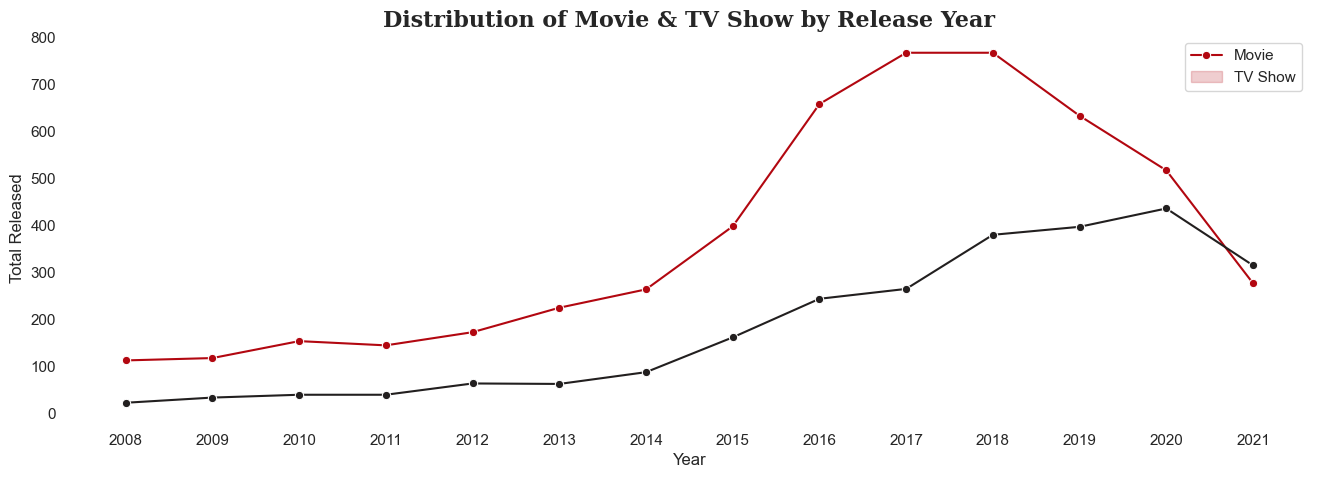

In [19]:
df['release_year'] = df['release_year'].fillna(0)
df['release_year'] = df['release_year'].astype('int')
data = df.query("release_year >= 2008")
data = data.groupby(['release_year','type']).agg({'show_id':'count'}).rename({'show_id': 'total_released'}, axis = 1)

color_dict = dict({'Movie':'#b20710', 'TV Show':'#221f1f'})
sns.set(rc = {'figure.figsize': (16, 5), 'axes.facecolor':'white'})
ax = sns.lineplot(data=data, x="release_year", y="total_released", hue="type", marker="o", palette=color_dict)
ax.set_title("Distribution of Movie & TV Show by Release Year", fontfamily='serif', fontsize=16, fontweight='bold')
ax.set(xlabel='Year', ylabel='Total Released')
ax.set_xticks(range(2008, 2022))
plt.legend(labels=["Movie", "TV Show"])
plt.show()

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.8. Distribution of Movie & TV Show by Rating</span>

[Text(0.5, 0, 'Rating'), Text(0, 0.5, '')]

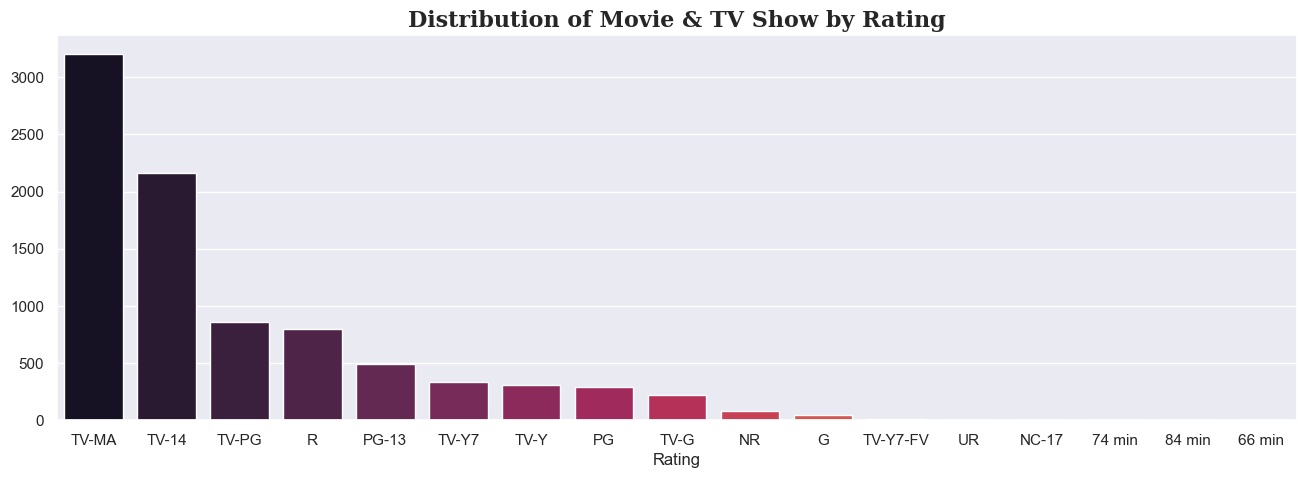

In [20]:
ratings = df.groupby(['rating']).agg({'show_id':'count'}).rename({'show_id': 'total_shows'}, axis = 1)
ratings = ratings.sort_values(['total_shows'], ascending = (False)).head(20).reset_index()

sns.set(rc = {'figure.figsize': (16, 5)})
ax = sns.barplot(data=ratings, x="rating", y="total_shows", palette='rocket')
ax.set_title("Distribution of Movie & TV Show by Rating", fontfamily='serif', fontsize=16, fontweight='bold')
ax.set(xlabel='Rating', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.9. Distribution of Movie by Duration (Minutes)</span>

[Text(0.5, 0, 'Minutes'), Text(0, 0.5, '')]

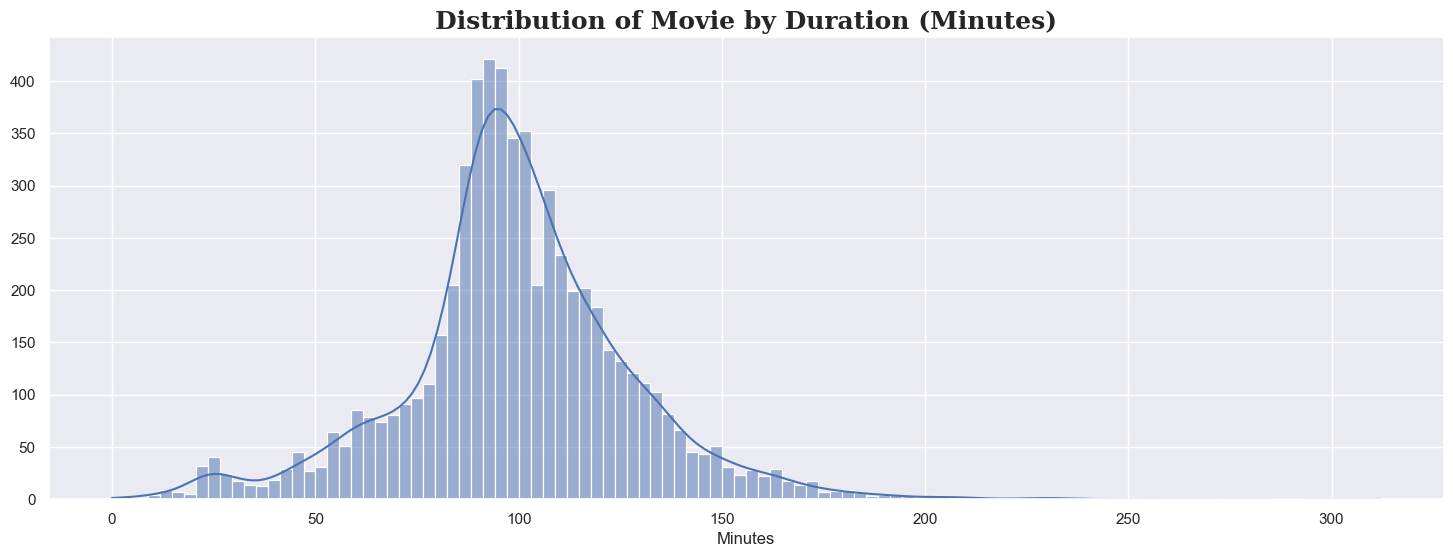

In [21]:
df_copy = df.copy()
df_copy = df_copy[df_copy['type'] == 'Movie']
df_copy['duration'] = df_copy['duration'].str.replace(' min', '')
df_copy['duration'] = df_copy['duration'].fillna(0)
df_copy['duration'] = df_copy['duration'].astype(int)

sns.set(rc = {'figure.figsize': (18, 6)})
ax = sns.histplot(data=df_copy['duration'], kde=True)
ax.set_title("Distribution of Movie by Duration (Minutes)", fontfamily='serif', fontsize=18, fontweight='bold')
ax.set(xlabel='Minutes', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.10. Distribution of TV Show by Seasons</span>

[Text(0.5, 0, 'Seasons'), Text(0, 0.5, '')]

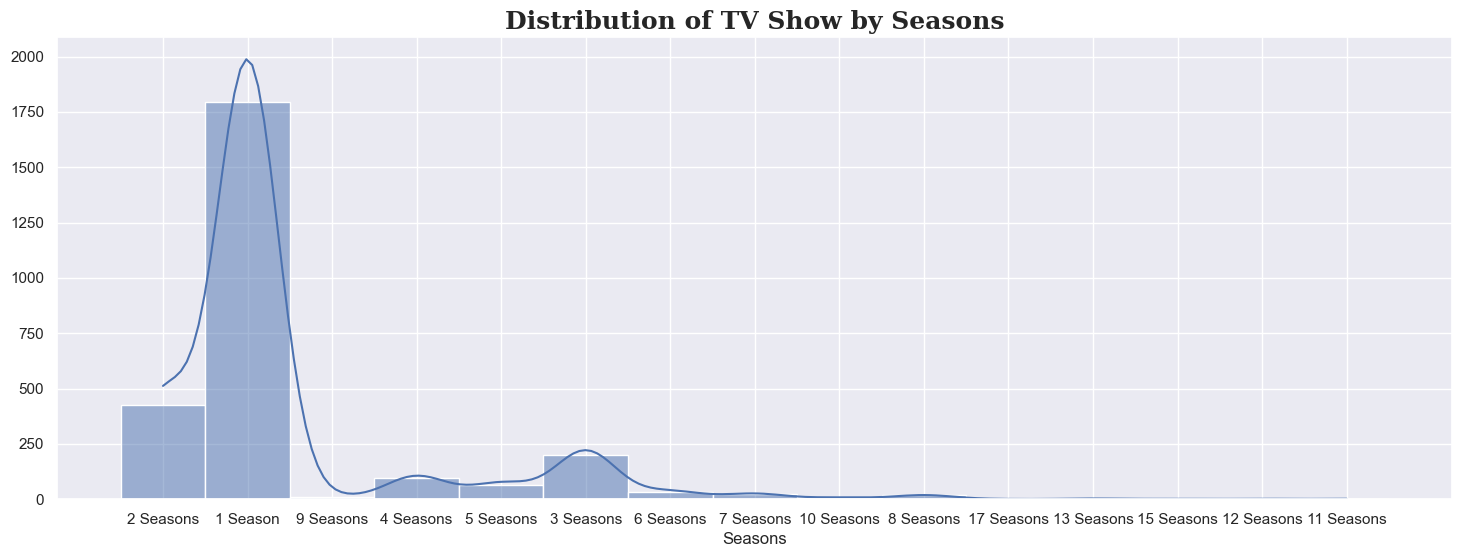

In [22]:
df_copy = df.copy()
df_copy = df_copy[df_copy['type'] == 'TV Show']

sns.set(rc = {'figure.figsize': (18, 6)})
ax = sns.histplot(data=df_copy['duration'], kde=True)
ax.set_title("Distribution of TV Show by Seasons", fontfamily='serif', fontsize=18, fontweight='bold')
ax.set(xlabel='Seasons', ylabel=None)

<span style="padding-left:17px; font-size:19px; color:#339; font-weight:bold">4.11. Word Cloud</span>

<span style="padding-left:20px; font-size:18px; color:#339; font-weight:bold">4.11.1 Word Cloud of Cast</span>

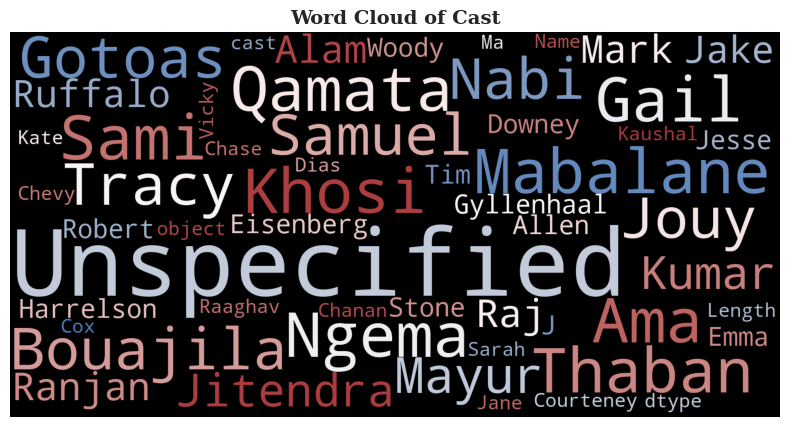

In [23]:
text = str(df['cast'])

plt.rcParams['figure.figsize'] = (10, 5)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1600,  height = 800, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.title('Word Cloud of Cast', fontfamily='serif', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

<span style="padding-left:20px; font-size:18px; color:#339; font-weight:bold">4.11.2 Word Cloud of Description</span>

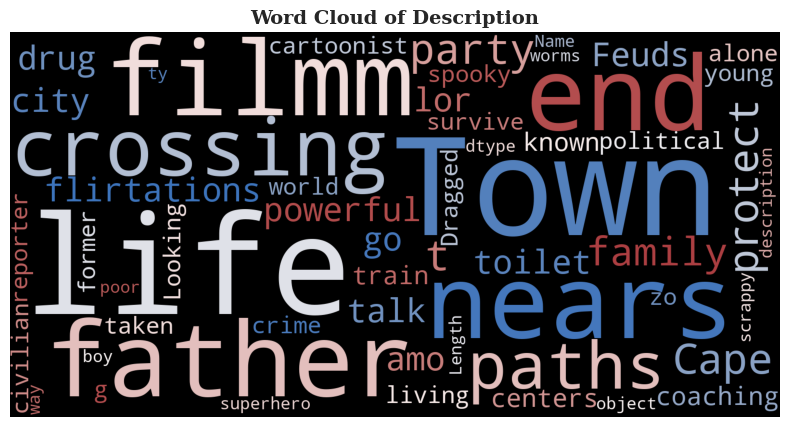

In [24]:
from wordcloud import WordCloud
text = str(df['description'])

plt.rcParams['figure.figsize'] = (10, 5)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1600,  height = 800, max_words = 125).generate(text)
plt.imshow(wordcloud)
plt.title('Word Cloud of Description', fontfamily='serif', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()